**Практикум 9. Многочлен Тейлора**

**Упражнение 1. Вычислить значения полинома $p(x) = x^7-3.2x^4+3x^2+3$ в точках $-1; 4; 2.2; π$. Значения аргументов задать в виде вектора. Сохранить значения полинома.**

In [36]:
import numpy as np

pol = [1, 0, 0, -3.2, 0, 3, 0, 3]
points = [-1, 4, 2.2, np.pi]
res = np.polyval(pol, points)

print(f"Значения полинома в точках (-1; 4; 2.2; π) равны соответственно: {res}.")

Значения полинома в точках (-1; 4; 2.2; π) равны соответственно: [1.80000000e+00 1.56158000e+04 1.91993869e+02 2.74119295e+03].


**Упражнение 2. Вычислить корни полинома $p(x) = 2x^8-3x^5+7x^2-2$, сохранить их, сделать проверку.**

In [37]:
import numpy as np

pol = [2, 0, 0, -3, 0, 0, 7, 0, -2]
res = np.roots(pol)

print(f"Корни полинома равны:")
for root in res:
    print(f"{root : .3f}")

Корни полинома равны:
-0.959+0.795j
-0.959-0.795j
-0.151+1.254j
-0.151-1.254j
 1.093+0.468j
 1.093-0.468j
-0.518+0.000j
 0.553+0.000j


**Упражнение 3. Вычислить произведение полиномов $p(x) = x^6+2x^5-3x^2+4$ и $q(x)=x^3-3x+1$, а также частное и остаток от деления $p(x)$ на $q(x)$.**

In [91]:
import numpy as np

pol_p = [1, 2, 0, 0, -3, 0, 4]
pol_q = [1, 0, -3, 1]

print("Произведение полиномов:", np.convolve(pol_p, pol_q))
print("Частное полиномов:", np.polydiv(pol_p, pol_q)[0])
print("Остаток от деления полиномов:", np.polydiv(pol_p, pol_q)[1])

Произведение полиномов: [  1   2  -3  -5  -1   0  13  -3 -12   4]
Частное полиномов: [1. 2. 3. 5.]
Остаток от деления полиномов: [ 4. 12. -1.]


**Упражнение 4. Написать функцию с двумя аргументами, осуществляющую сложение полиномов разной степени. Алгоритм:**

**$1)$ Найти большую из длин входных аргументов (обозначим её $m$).**

**$2)$ Создать вспомогательные векторы длины $m$, представляющие те же самые полиномы, что и аргументы. Для заполнения части элементов нулями можно использовать функцию $numpy.zeros$.**

**$3)$ Вычислить сумму.**

**Протестировать файл-функцию, используя полиномы $p(x) = x^6+2x^5-3x^2+4$ и $q(x)=x^3-3x+1$.**

In [97]:
import numpy as np

def findPolynomsSum(pol1, pol2):
    m = max(len(pol1), len(pol2))
    pol1_mod, pol2_mod = np.zeros(m), np.zeros(m)

    for i in range(len(pol1)):
        pol1_mod[m - len(pol1) + i] = pol1[i]

    for i in range(len(pol2)):
        pol2_mod[m - len(pol2) + i] = pol2[i]

    return pol1_mod + pol2_mod


pol_p = [1, 2, 0, 0, -3, 0, 4]
pol_q = [1, 0, -3, 1]

print("Сумма полиномов:", findPolynomsSum(pol_p, pol_q))

Сумма полиномов: [ 1.  2.  0.  1. -3. -3.  5.]


**Упражнение 5. Для многочленов $p(x) = x^5-x^4-3x^2-2$ и $q(x) = x^6-3x+1$, найти их производные, производную произведения и частного.**

In [95]:
import numpy as np

pol_p = [1, -1, 0, -3, 0, -2]
pol_q = [1, 0, 0, 0, 0, -3, 1]

print("Производная полинома p(x):", np.polyder(pol_p))
print("Производная полинома q(x):", np.polyder(pol_q))
print("Производная произведений полиномов:", np.polyder(np.convolve(pol_p, pol_q)))
print("Производная частного полиномов:", np.polyder(np.polydiv(pol_q, pol_p)[0]))

Производная полинома p(x): [ 5 -4  0 -6  0]
Производная полинома q(x): [ 6  0  0  0  0 -3]
Производная произведений полиномов: [ 11 -10   0 -24   0 -30  20  -4  27  -6   6]
Производная частного полиномов: [1.]


**Упражнение 6. Создать функцию, вычисляющую производную порядка $n$ полинома $p(x)$, заданного вектором коэффициентов. Производную задать вектором коэффициентов. С помощью созданной файл-функции найти 5-ую производную полинома $p(x) = x^{10}-x^7+3x^2-2$ и вычислить её значение в точке $0.2$.**

In [116]:
import numpy as np

def findPolynomDericative(pol, order):
    for i in range(1, order + 1):
        pol = np.polyder(pol)
    return pol

pol = [1, 0, 0, -1, 0, 0, 0, 0, 3, 0, -2]

print("5-я производная полинома p(x):", np.polyder(pol, 5))
print("5-я производная полинома p(x):", findPolynomDericative(pol, 5))
print("Значение 5-ой производной полинома p(x) в точке 0.2:", np.polyval(findPolynomDericative(pol, 5), 0.2))

5-я производная полинома p(x): [30240     0     0 -2520     0     0]
5-я производная полинома p(x): [30240     0     0 -2520     0     0]
Значение 5-ой производной полинома p(x) в точке 0.2: -91.1232


**Упражнение 7. Создать сценарий на языке программирования Python, вычисляющий значения коэффициентов $b_k$ (в виде вектора) в многочлене Тейлора для полинома произвольной степени в произвольной точке.  С помощью созданной функции вычислить коэффициенты $b_k$ для разложений полинома $p(x) = x^6+2x^4-3x-2$ в многочлен Тейлора по степеням $x-1$ и $x+2$.**

In [133]:
import numpy as np

def getTaylorCoeffs(pol, point):
    b_k = []
    c = 0
    while np.any(pol) != 0:
        b_k.append(np.polyval(pol, point) / np.math.factorial(c))
        pol = np.polyder(pol)
        c += 1
    return b_k

pol = [1, 0, 2, 0, 0, -3, -2]

point1 = 1
point2 = -2

print("Коэффициенты в многочлене Тейлора по степени x-1:", getTaylorCoeffs(pol, point1))
print("Коэффициенты в многочлене Тейлора по степени x+2:", getTaylorCoeffs(pol, point2))

Коэффициенты в многочлене Тейлора по степени x-1: [-2.0, 11.0, 27.0, 28.0, 17.0, 6.0, 1.0]
Коэффициенты в многочлене Тейлора по степени x+2: [100.0, -259.0, 288.0, -176.0, 62.0, -12.0, 1.0]


**Упражнение С1. Вычислить корни полинома $p(x) = x^6-1$, сохранить их, сделать проверку.**

In [142]:
import numpy as np

pol = [1, 0, 0, 0, 0, 0, -1]
res = np.roots(pol)

print(f"Корни полинома равны:")
for root in res:
    print(f"{root : .3f}")

print(f"\nПроверка:")
for root in res:
    print(np.isclose(np.polyval(pol, root), 0))

Корни полинома равны:
-1.000+0.000j
-0.500+0.866j
-0.500-0.866j
 0.500+0.866j
 0.500-0.866j
 1.000+0.000j

Проверка:
True
True
True
True
True
True


**Упражнение C2. Вычислить произведение полиномов $p(x) = x^2+x+1$ и $q(x)=x-1$, частное и остаток от деления $p(x)$ на $q(x)$, сумму полиномов.**

In [144]:
import numpy as np

def findPolynomsSum(pol1, pol2):
    m = max(len(pol1), len(pol2))
    pol1_mod, pol2_mod = np.zeros(m), np.zeros(m)

    for i in range(len(pol1)):
        pol1_mod[m - len(pol1) + i] = pol1[i]

    for i in range(len(pol2)):
        pol2_mod[m - len(pol2) + i] = pol2[i]

    return pol1_mod + pol2_mod

pol_p = [1, 1, 1]
pol_q = [1, -1]

print("Произведение полиномов:", np.convolve(pol_p, pol_q))
print("Частное полиномов:", np.polydiv(pol_p, pol_q)[0])
print("Остаток от деления полиномов:", np.polydiv(pol_p, pol_q)[1])
print("Сумма полиномов:", findPolynomsSum(pol_p, pol_q))

Произведение полиномов: [ 1  0  0 -1]
Частное полиномов: [1. 2.]
Остаток от деления полиномов: [3.]
Сумма полиномов: [1. 2. 0.]


**Упражнение С3. Для многочлена $p(x)=x^3-2x^2+1$ записать многочлен Тейлора по степеням $x-2$.**

In [148]:
import numpy as np

def getTaylorCoeffs(pol, point):
    b_k = []
    c = 0
    while np.any(pol) != 0:
        b_k.append(np.polyval(pol, point) / np.math.factorial(c))
        pol = np.polyder(pol)
        c += 1
    return b_k

pol = [1, -2, 0, 1]

point = 2

print("Коэффициенты в многочлене Тейлора по степени x-2:", getTaylorCoeffs(pol, point))

Коэффициенты в многочлене Тейлора по степени x-2: [1.0, 4.0, 4.0, 1.0]


$p(x) = x^3-2x^2+1 = 1(x-2)^0+4(x-2)^1+4(x-2)^2+1*(x-2)^3 = 1+4(x-2)+4(x-2)^2+(x-2)^3$

$p(x) = x^3-2x^2+1 = 1+4(x-2)+4(x-2)^2+(x-2)^3$

**Ответить на контрольные вопросы:**

**1) Рассмотрим многочлен $p(x) = a_0x^n+a_1x^{n-1}+...+a_{n-1}x+a_n$. Как расположены относительно друг друга графики его многочленов Тейлора порядка $n$, выписанные по степеням $x-x_1$ и $x-x_2$, если $x_1≠x_2$.**

In [154]:
import numpy as np

def getTaylorCoeffs(pol, point):
    b_k = []
    c = 0
    while np.any(pol) != 0:
        b_k.append(np.polyval(pol, point) / np.math.factorial(c))
        pol = np.polyder(pol)
        c += 1
    return b_k

pol = [2, -5, 3, 1]

point1 = 1
point2 = 3

print("Коэффициенты в многочлене Тейлора по степени x-1:", getTaylorCoeffs(pol, point1))
print("Коэффициенты в многочлене Тейлора по степени x-3:", getTaylorCoeffs(pol, point2))

Коэффициенты в многочлене Тейлора по степени x-1: [1.0, -1.0, 1.0, 2.0]
Коэффициенты в многочлене Тейлора по степени x-3: [19.0, 27.0, 13.0, 2.0]


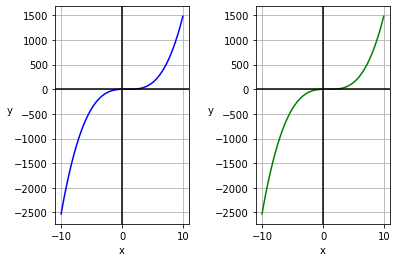

In [167]:
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
    return 1 - (x - 1) + (x - 1) ** 2 + 2 * (x - 1) ** 3

def f2(x):
    return 19 + 27 * (x - 3) + 13 * (x - 3) ** 2 + 2 * (x - 3) ** 3

x = np.arange(-10, 10, 0.1)
plt.subplot(1, 2, 1)
plt.plot(x, f1(x), "b")

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.subplot(1, 2, 2)
plt.plot(x, f2(x), "g")

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.show()

*Графики многочленов совпадают.*

**2) Рассмотрим многочлен $p(x) = a_0x^n+a_1x^{n-1}+...+a_{n-1}x+a_n$. Как расположен его график относительно графика его многочлена Тейлора порядка $n$, выписанного по степеням $x-x_0$, если $x_0≠0$.**

In [168]:
import numpy as np

def getTaylorCoeffs(pol, point):
    b_k = []
    c = 0
    while np.any(pol) != 0:
        b_k.append(np.polyval(pol, point) / np.math.factorial(c))
        pol = np.polyder(pol)
        c += 1
    return b_k

pol = [2, -5, 3, 1]

point1 = 1
point2 = 3

print("Коэффициенты в многочлене Тейлора по степени x-1:", getTaylorCoeffs(pol, point1))

Коэффициенты в многочлене Тейлора по степени x-1: [1.0, -1.0, 1.0, 2.0]


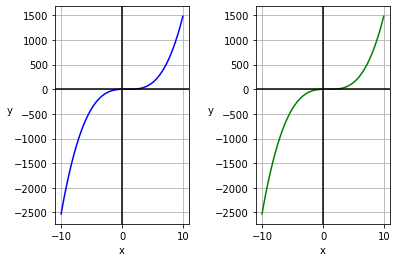

In [170]:
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
    return 2 * x ** 3 - 5 * x ** 2 + 3 * x + 1

def f2(x):
    return 1 - (x - 1) + (x - 1) ** 2 + 2 * (x - 1) ** 3

x = np.arange(-10, 10, 0.1)
plt.subplot(1, 2, 1)
plt.plot(x, f1(x), "b")

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.subplot(1, 2, 2)
plt.plot(x, f2(x), "g")

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.show()

*Графики многочленов совпадают.*